### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 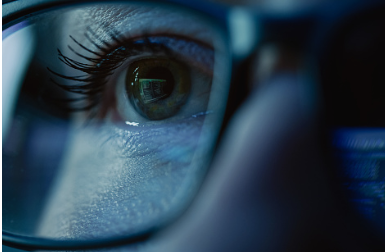 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [1]:
# Importing the necessary Library
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pathlib
import random
import keras
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating the directory for dataset and caterory
directory = r"C:\Users\Admin\Desktop\Rishabh\SkilloVilla\Assignments\Assignment - Image classification using CNN\glasses"
categories = ['glasses', 'no_glasses']

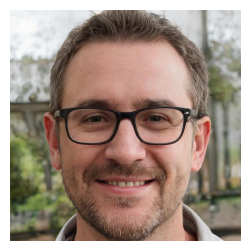

In [3]:
# Image size definition and reading 1 image
plt.figure(1,figsize=(7,3))

# From both the categories
for category in categories:
    path = os.path.join(directory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.axis('off')
        plt.show()
        break
    break

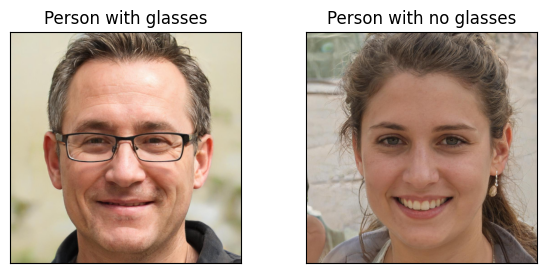

In [4]:
glass_pic = r'C:\Users\Admin\Desktop\Rishabh\SkilloVilla\Assignments\Assignment - Image classification using CNN\glasses\glasses\face-1815.jpg'
no_glass_pic = r'C:\Users\Admin\Desktop\Rishabh\SkilloVilla\Assignments\Assignment - Image classification using CNN\glasses\no_glasses\face-541.jpg'

plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
img_array = cv2.imread(glass_pic)
img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.title('Person with glasses')
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
img_array_1 = cv2.imread(no_glass_pic)
img_array_1 = cv2.cvtColor(img_array_1,cv2.COLOR_BGR2RGB)
plt.imshow(img_array_1)
plt.title('Person with no glasses')
plt.xticks([]), plt.yticks([])

plt.show()

In [5]:
# Prepare the data
data = []

def create_data():
    for category in categories:
        path = os.path.join(directory, category)
        class_number = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (128, 128))
                data.append([new_array, class_number])
            except Exception as e:
                pass

create_data()

# Shuffle the data
random.shuffle(data)

In [6]:
# Separate features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [7]:
image_size=128

Data Preprocessing

In [8]:
def plot_image(data,index):
    plt.figure(figsize=(15,5))
    plt.imshow(data[index][0])
    plt.xlabel(categories[data[index][1]])
    plt.show()

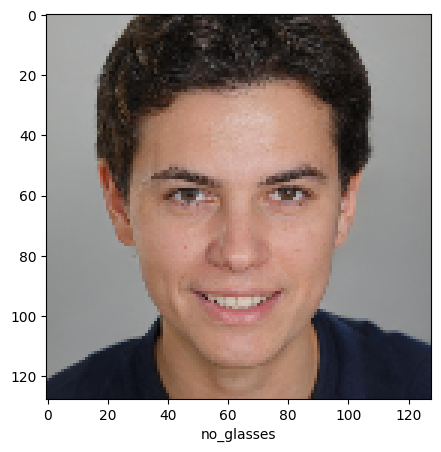

In [9]:
plot_image(data,2)

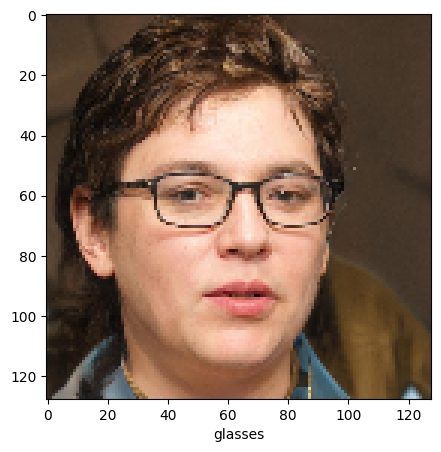

In [10]:
plot_image(data,36)

In [11]:
X = [] ; y = []

for features,label in data:
    X.append(features)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print(X.shape,y.shape)

(86, 128, 128, 3) (86,)


In [12]:
X=np.array(X)
y=np.array(y)

In [13]:
# Split the data into training, validation, and test sets
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Normalize the data
X_train_scaled = X_train / 255.0
X_val_scaled = X_val / 255.0
X_test_scaled = X_test / 255.0

In [14]:
# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.5),
    layers.RandomContrast(0.6),
    layers.RandomFlip(mode="horizontal")
])

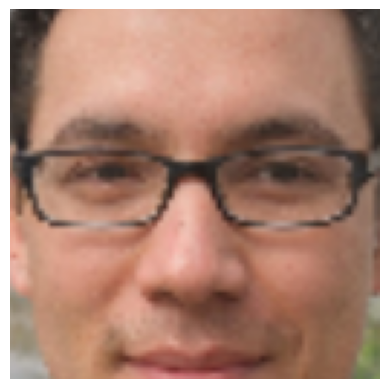

In [15]:
# Display augmented image
plt.axis('off')
plt.imshow(data_augmentation(X)[4].numpy().astype("uint8"))
plt.show()
# More Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)


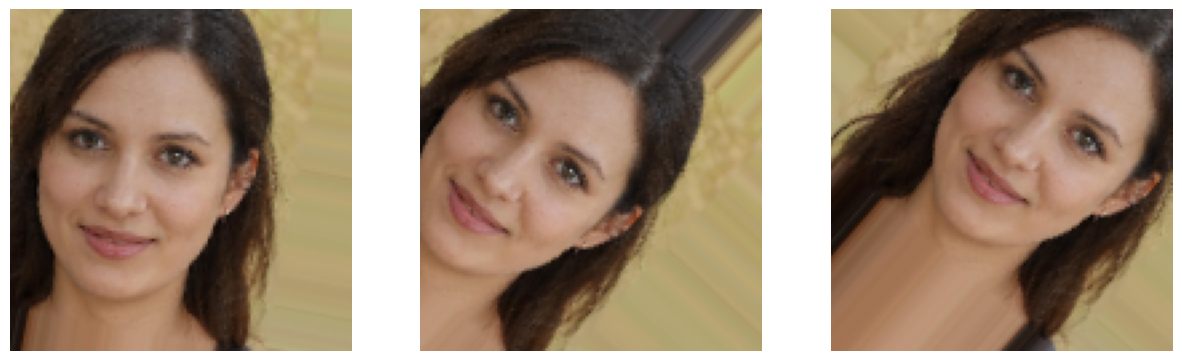

In [16]:
img_sample = X_train[0].reshape((1, 128, 128, 3))
aug_iter = datagen.flow(img_sample, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
plt.show()

Model Building

In [17]:
# Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # First convolution layer with 32 filters and 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # First max-pooling layer with 2x2 pool size

    Conv2D(64, (3, 3), activation='relu'),  # Second convolution layer with 64 filters and 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Second max-pooling layer with 2x2 pool size

    Conv2D(128, (3, 3), activation='relu'),  # Third convolution layer with 128 filters and 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Third max-pooling layer with 2x2 pool size

    Flatten(),  # Flatten layer to convert 3D features to 1D feature vector

    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dropout(0.5),  # Dropout layer with 50% dropout rate

    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=23, validation_data=(X_val_scaled, y_val))

Epoch 1/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.9887 - loss: 0.0788 - val_accuracy: 0.8889 - val_loss: 0.2754
Epoch 2/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.9203 - loss: 0.1455 - val_accuracy: 0.8889 - val_loss: 0.2251
Epoch 3/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.9623 - loss: 0.1225 - val_accuracy: 0.7778 - val_loss: 0.2739
Epoch 4/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9511 - loss: 0.1655 - val_accuracy: 0.8889 - val_loss: 0.2555
Epoch 5/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.9887 - loss: 0.0752 - val_accuracy: 0.8889 - val_loss: 0.1228
Epoch 6/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9809 - loss: 0.0449 - val_accuracy: 1.0000 - val_loss: 0.0675
Epoch 7/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.9662 - loss: 0.0601 - val_accuracy: 1.0000 - val_loss: 0.0912
Epoch 8/23
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.9887 - loss: 0.0288 - val_accuracy: 0.8889 - val_loss:

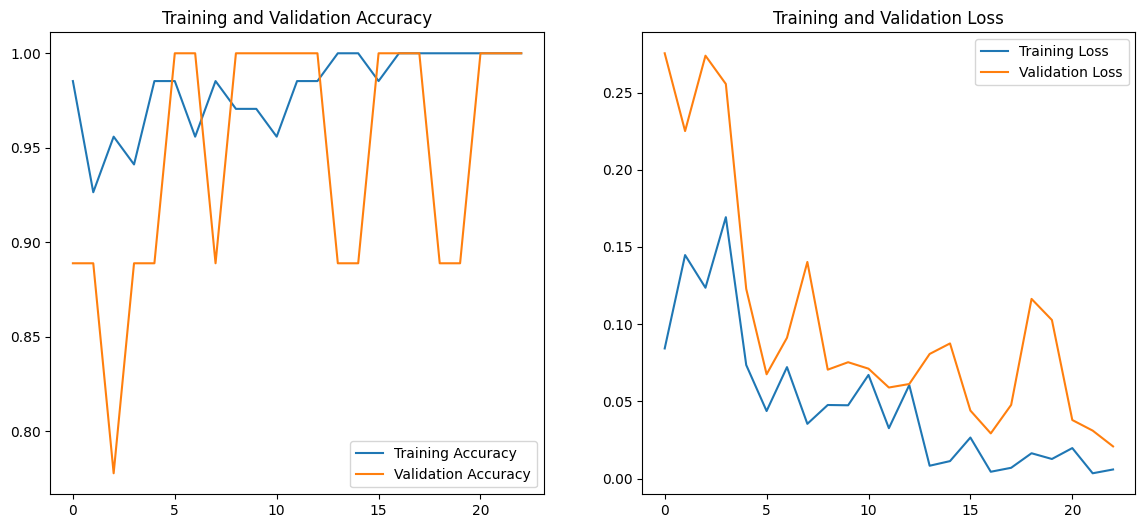

In [26]:
# Plotting the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(23)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0018
Test Accuracy: 1.0000


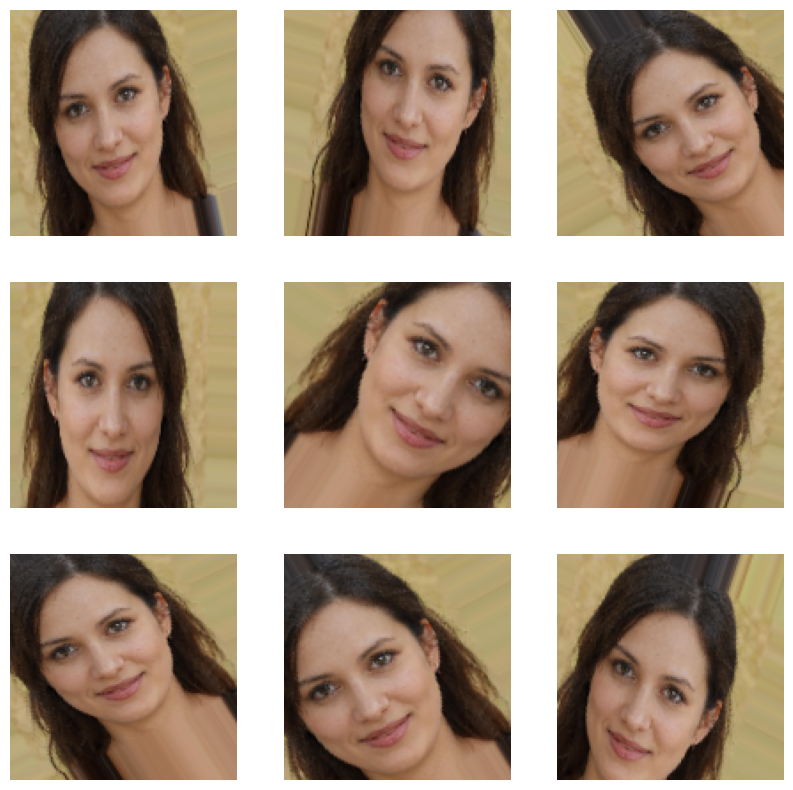

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Display some augmented images
img_sample = X_train[0].reshape((1, 128, 128, 3))
aug_iter = datagen.flow(img_sample, batch_size=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(aug_iter)
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


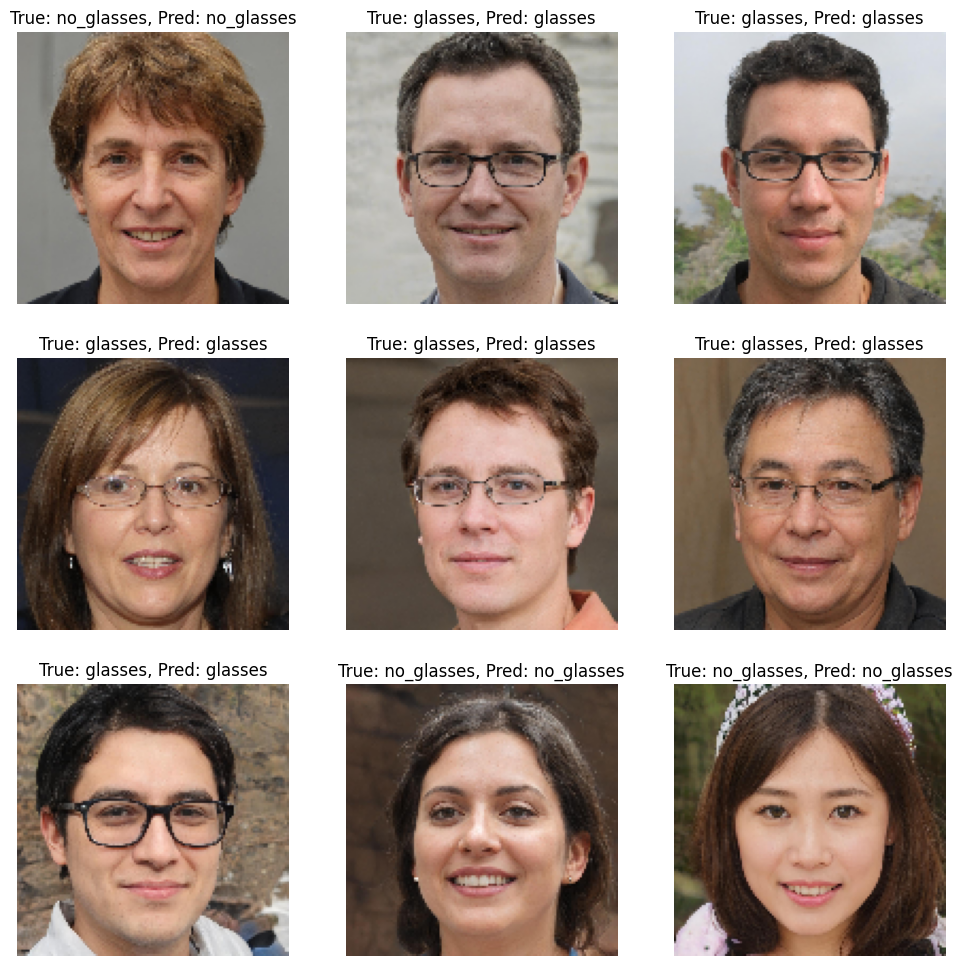

In [29]:
# Predictions on test data
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Visualizing some predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test_scaled[i])
    plt.title(f"True: {categories[y_test[i]]}, Pred: {categories[predictions[i][0]]}")
    plt.axis('off')
plt.show()

In [30]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print(classification_report(y_test, predictions, target_names=categories))

[[6 0]
 [0 3]]
              precision    recall  f1-score   support

     glasses       1.00      1.00      1.00         6
  no_glasses       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

